In [ ]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
np.random.seed(42)

In [ ]:
train = pd.read_csv('./boxoffice_data/train.csv')
test = pd.read_csv('./boxoffice_data/test.csv')


In [ ]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [ ]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

In [ ]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [ ]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac37c626d8>,
      dtype=object)

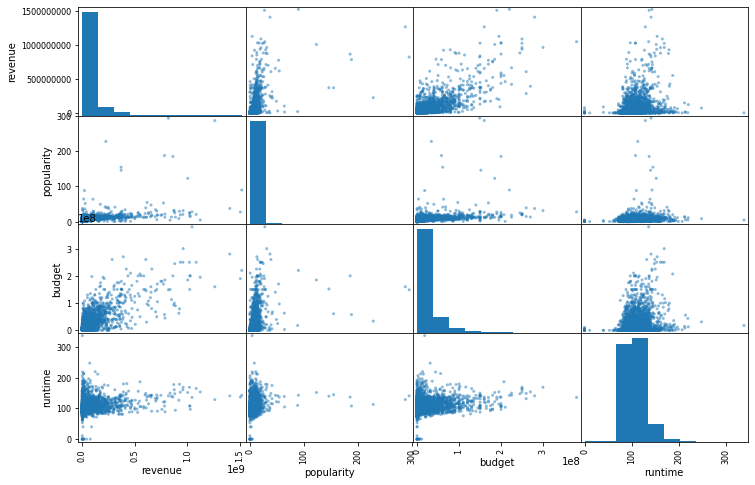

In [ ]:
attributes = ["revenue", "popularity", "budget",
 "runtime"]
pd.plotting.scatter_matrix(train[attributes], figsize=(12, 8))

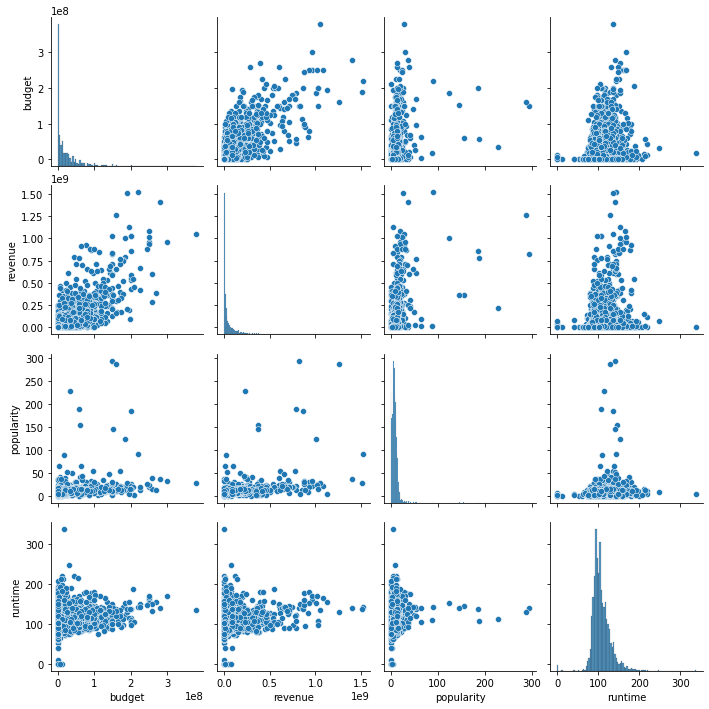

In [ ]:
sns.pairplot(train[["budget","revenue", "popularity", "runtime"]])

In [ ]:
test.index=test.index+3000

#df=pd.concat([train.drop("revenue",axis=1),test]).drop("id", axis=1)
df = train.copy()
y_train=train["revenue"]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class fix_features(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        features_to_fix=["belongs_to_collection", "genres", "production_companies", "production_countries",\
                        "Keywords"]

        for feature in features_to_fix:
            X.loc[X[feature].notnull(),feature]=\
            X.loc[X[feature].notnull(),feature].apply(lambda x : ast.literal_eval(x))\
            .apply(lambda x : [y["name"] for y in x])

        return X  

class jsonish_to_list(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        X.loc[X["cast"].notnull(),"cast"]=X.loc[X["cast"].notnull(),"cast"].apply(lambda x : ast.literal_eval(x))
        X.loc[X["crew"].notnull(),"crew"]=X.loc[X["crew"].notnull(),"crew"].apply(lambda x : ast.literal_eval(x))
        return X

class cat_to_bool(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        X.loc[X["homepage"].notnull(),"homepage"]=1
        X["homepage"]=X["homepage"].fillna(0)  # Note that we only need to know if the film has a webpage or not!
          
        X["in_collection"]=1
        X.loc[X["belongs_to_collection"].isnull(),"in_collection"]=0

        X["has_tagline"]=1
        X.loc[X["tagline"].isnull(),"has_tagline"]=0

        X["isReleased"]=1
        X.loc[X["status"]!="Released","isReleased"]=0

        return X

class split_release_date(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        release_date=pd.to_datetime(X["release_date"])
        X["release_year"]=release_date.dt.year
        X["release_month"]=release_date.dt.month
        X["release_day"]=release_date.dt.day
        X["release_wd"]=release_date.dt.dayofweek
        X["release_quarter"]=release_date.dt.quarter

        return X

class makeCrewRoles(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        X["Director"]=[[] for i in range(X.shape[0])]
        X["Producer"]=[[] for i in range(X.shape[0])]
        X["Executive Producer"]=[[] for i in range(X.shape[0])]

        X["Director"]=X.loc[X["crew"].notnull(),"crew"]\
        .apply(lambda x : [y["name"] for y in x if y["job"]=="Director"])

        X["Producer"]=X.loc[X["crew"].notnull(),"crew"]\
        .apply(lambda x : [y["name"] for y in x if y["job"]=="Producer"])

        X["Executive Producer"]=X.loc[X["crew"].notnull(),"crew"]\
        .apply(lambda x : [y["name"] for y in x if y["job"]=="Executive Producer"])
        
        return X

class to_empty(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        to_empty_list=["belongs_to_collection","Keywords","production_companies","production_countries",\
                      "Director","Producer","Executive Producer","cast","genres"]

        for feature in to_empty_list:
            X[feature] = X[feature].apply(lambda d: d if isinstance(d, list) else [])

        return X


class to_zero(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        to_zero_list=["runtime","release_month","release_year","release_wd","release_quarter","release_day"]
        for f in to_zero_list:
            X[f]=X[f].fillna(0) 
        return X


class dropAttribs(BaseEstimator, TransformerMixin):
  def __init__(self):
        return
  def fit(self, X, y=None):
        return self
  def transform(self, X, y=None):
        to_drop_list = ["imdb_id","overview","poster_path","tagline","status","release_date","spoken_languages","crew"]
        X = X.drop(to_drop_list,axis=1)
        return X

In [ ]:
#fix_features()        .transform(df)
#jsonish_to_list()     .transform(df)
#cat_to_bool()         .transform(df)
#split_release_date()  .transform(df)
#makeCrewRoles()       .transform(df)
#to_empty()            .transform(df)
#to_zero()             .transform(df)
#dropAttribs()         .transform(df)

In [ ]:
#df = dropAttribs().transform(df)

In [ ]:
df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [ ]:
#df.title = np.where(df.title.isnull(), df.original_title, df.title)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = df.select_dtypes([np.int64,np.float64]).columns
cat_attribs = df.select_dtypes([np.object]).columns
fix_attribs = ["belongs_to_collection", "genres", "production_companies", "production_countries","Keywords"]
jsonish_attribs = ["crew", "cast"]
to_empty_attribs = ["belongs_to_collection","Keywords","production_companies","production_countries",\
                      "Director","Producer","Executive Producer","cast","genres"]
to_zero_attribs = ["runtime","release_month","release_year","release_wd","release_quarter","release_day"]
drop_attribs = ["imdb_id","overview","poster_path","tagline","status","release_date","spoken_languages","crew"]

#num_pipeline = Pipeline([()])

cat_pipeline = Pipeline(
    [
     ('cat_to_bool', cat_to_bool()),
     ("crew_roles", makeCrewRoles()),
     ('OHE', OneHotEncoder()),
    ]
)

full_pipe = ColumnTransformer([
    ("fix_attribs", fix_features(), fix_attribs), 
    ("jsonish", jsonish_to_list(), jsonish_attribs), 
    ("date", split_release_date(), ["release_date"]),
    ("cat", cat_pipeline, cat_attribs),
    ("to_empty", to_empty(), to_empty_attribs),
    ("to_zero", to_zero(), to_zero_attribs),
    ("drop_attribs", dropAttribs(), drop_attribs),
    #("num", num_pipeline, num_attribs),
])

In [ ]:
full_pipe.fit_transform(df)

ValueError: ignored

In [ ]:
df.isna().sum()